In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# Quantum States in a Finite Box

Let us try and solve for the energies of a particle of mass $m$ within a 1D square well of radius $a$, e.g. 

\begin{equation}
    V(x) = \begin{cases}
        -V_0, & |x|\leq a, \\
        0, & |x| \geq a
    \end{cases}
\end{equation}

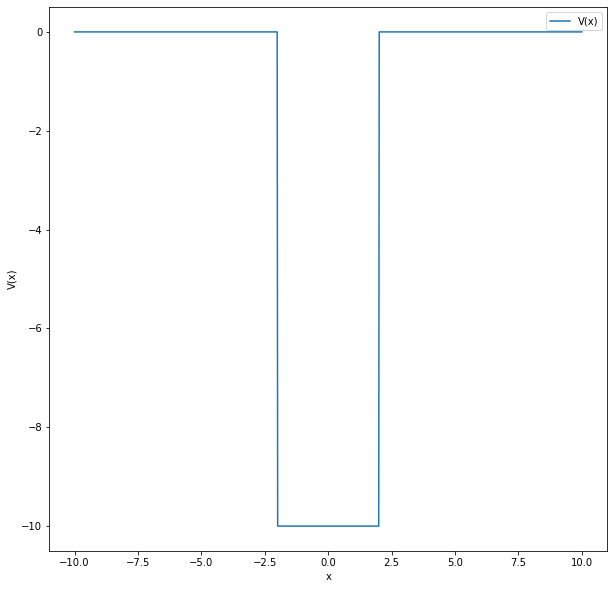

In [2]:
def V(x, a, V0=10): 
    Vout = np.ones_like(x) 
    Vout[np.abs(x)<=a] = -V0
    Vout[np.abs(x)>a] = 0
    
    return Vout
    
x = np.linspace(-10, 10, 1000) 
a = 2 

plt.figure(figsize=(10,10))
plt.plot(x, V(x, a), label='V(x)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend()
plt.show()

The problem with the finite potential well is that it's bound-state solutions obey a set of transcendental equations that can't be solved by hand. This raises the general mathematical question: **how can we find the roots of an equation** 
\begin{equation}
    f(x) = 0
\end{equation}

The simplest of such methods is known as the *bisection method* 

# Bisection 

Suppose that we know that a root of the equation $f(x)$ lies somewhere in the interval $(x_{-}, x_{+})$. Without loss of generality, assume that $f(x_{-})<0$ and $f(x_{+})>0$. Using this interval, we then select a new subinterval which shrinks the bound on the root. This subinterval selection process proceeds until we are within some allowable tolerance of the root.  

i:  0 x:  3.5 f(x):  -5.372913374581593
i:  1 x:  1.75 f(x):  -2.106492111298984
i:  2 x:  0.875 f(x):  0.40699371632665016
i:  3 x:  1.3125 f(x):  -0.8016324662223766
i:  4 x:  1.09375 f(x):  -0.1754354562153918
i:  5 x:  0.984375 f(x):  0.12239260297994425
i:  6 x:  1.0390625 f(x):  -0.025005422765343788
i:  7 x:  1.01171875 f(x):  0.049090138545859086
i:  8 x:  1.025390625 f(x):  0.012139324014991182
i:  9 x:  1.0322265625 f(x):  -0.006409081221774748
i:  10 x:  1.02880859375 f(x):  0.002871147695383547
i:  11 x:  1.030517578125 f(x):  -0.0017674644655767402
i:  12 x:  1.0296630859375 f(x):  0.0005522177242860415
i:  13 x:  1.03009033203125 f(x):  -0.0006075294101504092
i:  14 x:  1.029876708984375 f(x):  -2.7632344450800872e-05
i:  15 x:  1.0297698974609375 f(x):  0.0002622985655824639
i:  16 x:  1.0298233032226562 f(x):  0.00011733457935148017
i:  17 x:  1.0298500061035156 f(x):  4.4851484630514804e-05
i:  18 x:  1.0298633575439453 f(x):  8.609661882763575e-06
i:  19 x:  1.0298700

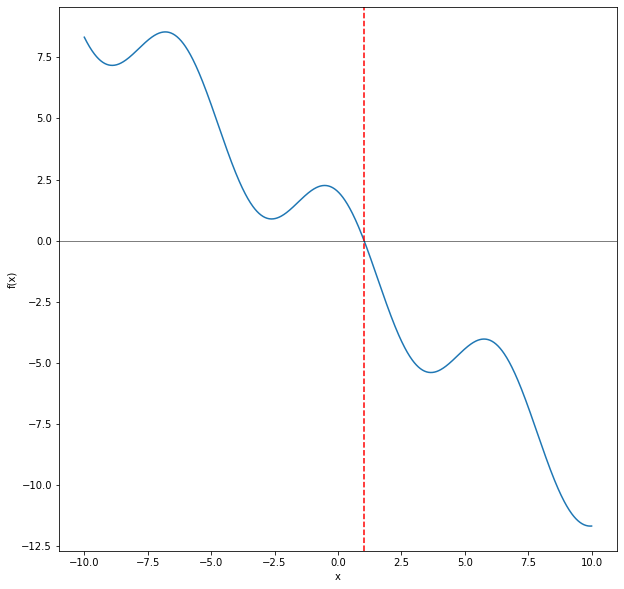

In [23]:
def f(x):
    return 2*np.cos(x)-x 

x = np.linspace(-10,10, 1000)
y = f(x) 

plt.figure(figsize=(10,10))
plt.plot(x,y) 
plt.xlabel('x')
plt.ylabel('f(x)')


# Note: we should try a recursive definition of this function 
def bisection(f, xminus, xplus, Nmax, eps): 
    for i in range(0, Nmax): 
        x = (xplus+xminus)/2
        print('i: ', i, 'x: ', x, 'f(x): ', f(x))
        # now that we have new x, we need to update interval based on 
        # the sign 
        if f(xplus)*f(x) > 0: 
            xplus = x 
        else: 
            xminus = x
        
        # Check to see we are within tolerance 
        if np.abs(f(x)) < eps: 
            break 
        
        if i == Nmax-1:
            print ('\n Root NOT found after {0} iterations\n'.format(Nmax))
    
    return x 



root = bisection(f, 0, 7, 100, 1e-6) 

plt.axvline(root, color='r', linestyle='--')
plt.axhline(0, color='k', linewidth=0.5)

print(root)

# Newton-Raphson method 

To make a method that can work faster than the bisection method, we can attempt to use calculus to speed up the search. Instead of just halving the interval at each iteration, what if we used the tangent line to head towards 0 faster? 

Suppose we have a guess $x_0$, then we suppose a correction $\Delta x$ such that $x=x_0+\Delta x$ gets us to the root. Assuming $f(x)$ is smooth enough for a Taylor series expansion, we have 
\begin{align}
    f(x_0+\Delta x) &\approx f(x_0)+f'(x_0)\Delta x \\ 
    \Rightarrow \Delta x = -\frac{f(x_0)}{f'(x_0)}
\end{align}

As this method requires the evaluation of a derivative, we can use a finite difference scheme to compute an approximation to $f'(x_0)$, namely 
\begin{equation}
    \frac{df}{dx} \approx \frac{f(x+\delta x/2) - f(x-\delta x/2)}{\delta x}
\end{equation}
where $\delta x$ is a small change in $x$ that we choose

In [27]:
def Newton(f, x, Nmax, eps): 
    dx = x
    for i in range(0, Nmax):
        F = f(x) 
        if(np.abs(F) <= eps): 
            break
        print('i={}\t'.format(i), 'x = ', x, 'dx = ', dx)
        df = (f(x+dx/2)-f(x-dx/2))/dx
        dx = -F/df
        
        x += dx
    
    return x 

root = Newton(f, 7, 100, 1e-6)


i=0	 x =  7 dx =  7
i=1	 x =  0.6748349181012792 dx =  -6.325165081898721
i=2	 x =  1.5690353555376177 dx =  0.8942004374363386
i=3	 x =  1.0354637712318984 dx =  -0.5335715843057194
i=4	 x =  1.029830313402039 dx =  -0.0056334578298593485
